# Question1
Load the energy data from the file Energy Indicators.xls, which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013, and should be put into a DataFrame with the variable name of energy.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

Rename the following list of countries (for use in later questions):

"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,

e.g.

'Bolivia (Plurinational State of)' should be 'Bolivia',

'Switzerland17' should be 'Switzerland'.



Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"



Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries.

In [2]:
import numpy as np
import pandas as pd

In [90]:
energy = pd.read_excel("C:/Users/VIBIN/Desktop/practice/FINAL/Energy Indicators.xls")
energy = energy[16:243]
energy.drop(energy.columns[0:2], axis=1,inplace = True)
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']# or use this df. rename(columns={'Leader': 'Commander'}, inplace=True)
energy = energy.replace('...',np.NaN)
energy['Energy Supply'] *= 1000000 
energy['Country'] = energy['Country'].str.replace(r"\(.*\)","")
energy['Country'] = energy['Country'].str.replace("[0-9()]+$", "")
energy.set_index(['Country'],inplace=True)
country_name = {"Republic of Korea": "South Korea","United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}
energy.rename(index = country_name,inplace = True)
energy.head()

,Energy Supply,Energy Supply per Capita,% Renewable
Country,,,
Afghanistan,3.210000e+08,10.0,78.669280
Albania,1.020000e+08,35.0,100.000000
Algeria,1.959000e+09,51.0,0.551010
American Samoa,NaN,NaN,0.641026
Andorra,9.000000e+06,121.0,88.695650


In [91]:
GDP = pd.read_csv("world_bank.csv",skiprows = 4)
country_name = {"Korea, Rep": "South Korea","Iran, Islamic Rep": "Iran", "Hong Kong SAR, China": "Hong Kong"}
GDP.rename(index = country_name,inplace = True)
GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
GDP.set_index(['Country'],inplace=True)
GDP.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [92]:
ScimEn = pd.read_excel("C:/Users/VIBIN/Desktop/practice/FINAL/scimagojr-3.xlsx")
ScimEn.set_index(['Country'],inplace=True)
ScimEn= ScimEn[:15]
ScimEn
#a= ScimEn.Country
#GDP.loc[GDP['Country'].isin(a)]

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57
Canada,6,17899,17620,215003,40930,12.01,149
Germany,7,17027,16831,140566,27426,8.26,126
India,8,15005,14841,128763,37209,8.58,115
France,9,13153,12973,130632,28601,9.93,114


In [36]:
#df = pd.merge(ScimEn,energy,how='inner',left_on='Country',right_on='Country')
df = ScimEn.join(energy)
#df  = df2[['Country','Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations','Citations per document', 'H index', 'Energy Supply',
#        'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
#        '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
#df.set_index(['Country'],inplace = True)
#df = df.head(15)
df2 = df.join(GDP)
print(df2.shape)
df2
#a= df1.Country
#GDP.loc[GDP['Country'].isin(a)]

(15, 20)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Question 2 

The previous question joined three datasets then reduced this to just the top 15 entries. how many entries did you lose after joining the datasets and reducing it to the top 15 items, ?


In [37]:
df3 = ScimEn.join(energy,how = 'outer')
df4 = df3.join(GDP,how = 'outer')
print(df4.shape)
df2[df2.columns[10:]].mean(axis=1)

(310, 20)


Country
China                 6.348609e+12
United States         1.536434e+13
Japan                 5.542208e+12
United Kingdom        2.487907e+12
Russian Federation    1.565459e+12
Canada                1.660647e+12
Germany               3.493025e+12
India                 1.769297e+12
France                2.681725e+12
South Korea                    NaN
Italy                 2.120175e+12
Spain                 1.418078e+12
Iran                           NaN
Australia             1.164043e+12
Brazil                2.189794e+12
dtype: float64

In [38]:
#By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?


df2['avgGDP'] = df2[df2.columns[10:]].mean(axis=1)
df2.sort_index(by = 'avgGDP',ascending = False,inplace = True)
df2.iloc[5]['2015']-df2.iloc[5]['2006']

C:\Users\VIBIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


246702696075.3999

In [39]:
#What is the mean Energy Supply per Capita?
df2['Energy Supply per Capita'].mean()

160.35714285714286

In [40]:
(df2.loc[df2['% Renewable'].argmax()].name,df2.loc[df2['% Renewable'].argmax()]['% Renewable'])

C:\Users\VIBIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('Brazil', 69.64803)

In [41]:
#Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?
df2['ratio']=df2['Self-citations']/df2['Citations']
df2
a=df2.sort_index(by = 'avgGDP',ascending = False,inplace = False).ix[0]
a.name,a.ratio

C:\Users\VIBIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.
C:\Users\VIBIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


('United States', 0.33503055761011974)

In [42]:
df2.iloc[0].name


'United States'

In [43]:
#Question 8 (6.6%)
#Create a column that estimates the population using Energy Supply and Energy Supply per capita. What is the third most populous country according to this estimate?
df2['Population'] = df2['Energy Supply']/df2['Energy Supply per Capita']

a = df2.sort_index(by= 'Population', ascending = False, inplace= False).iloc[2]
a.name

C:\Users\VIBIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """


'United States'

In [44]:
#Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?
#Question 7
df2['Citations Ratio'] = df2['Self-citations']/df2['Citations']
a = df2.sort_index(by = 'Citations Ratio',ascending = False, inplace = False).iloc[0]
a.name,a['Citations Ratio']

C:\Users\VIBIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


('China', 0.6893126179389422)

In [45]:
#What country has the maximum % Renewable and what is the percentage?
df2.loc[df2['% Renewable'].argmax()].name,df2.loc[df2['% Renewable'].argmax()]['% Renewable']

C:\Users\VIBIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


('Brazil', 69.64803)

In [46]:
df2['Citable Documents Per Person'] = df2['Citable documents']/df2['Population']
df2['Citable Documents Per Person'].corr(df2['Energy Supply per Capita'])

0.7901935488300874

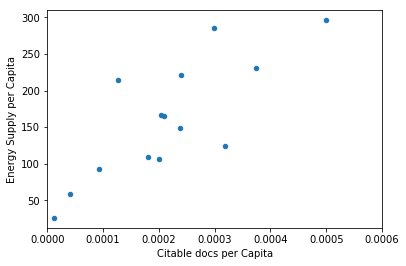

In [29]:
import matplotlib as plt
%matplotlib inline
    
Top15 = df2
Top15['Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['Population']
Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [31]:
mid = Top15['% Renewable'].median()
Top15['HighRenew'] = Top15['% Renewable']>=mid
Top15['HighRenew'] = Top15['HighRenew'].apply(lambda x:1 if x else 0)
Top15.sort_values(by='Rank', inplace=True)
Top15['HighRenew']
Top15

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2015,avgGDP,ratio,Population,Citations Ratio,Citable Documents Per Person,Citable docs per Capita,HighRenew,PopEst,population
Country,,,,,,,,,,,,,,,,,,,,,
Asia,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,8.797999e+12,6.348609e+12,0.689313,1.367645e+09,0.689313,0.000093,0.000093,1,1.367645e+09,1.367645e+09
North America,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.654857e+13,1.536434e+13,0.335031,3.176154e+08,0.335031,0.000298,0.000298,0,3.176154e+08,3.176154e+08
Asia,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.669563e+12,5.542208e+12,0.275997,1.274094e+08,0.275997,0.000238,0.000238,0,1.274094e+08,1.274094e+08
Europe,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.666333e+12,2.487907e+12,0.183773,6.387097e+07,0.183773,0.000319,0.000319,0,6.387097e+07,6.387097e+07
Europe,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.616149e+12,1.565459e+12,0.362517,1.435000e+08,0.362517,0.000128,0.000128,1,1.435000e+08,1.435000e+08
North America,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.792609e+12,1.660647e+12,0.190369,3.523986e+07,0.190369,0.000500,0.000500,1,3.523986e+07,3.523986e+07
Europe,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.685556e+12,3.493025e+12,0.195111,8.036970e+07,0.195111,0.000209,0.000209,1,8.036970e+07,8.036970e+07
Asia,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,2.367206e+12,1.769297e+12,0.288973,1.276731e+09,0.288973,0.000012,0.000012,0,1.276731e+09,1.276731e+09
Europe,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.761185e+12,2.681725e+12,0.218943,6.383735e+07,0.218943,0.000203,0.000203,0,6.383735e+07,6.383735e+07


In [32]:
Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)
Top15['PopEst'].apply(lambda x: '{0:,}'.format(x))
type(Top15['PopEst'])
df2

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2015,avgGDP,ratio,Population,Citations Ratio,Citable Documents Per Person,Citable docs per Capita,HighRenew,PopEst,population
Country,,,,,,,,,,,,,,,,,,,,,
Asia,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,8.797999e+12,6.348609e+12,0.689313,1.367645e+09,0.689313,0.000093,0.000093,1,1.367645e+09,1.367645e+09
North America,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.654857e+13,1.536434e+13,0.335031,3.176154e+08,0.335031,0.000298,0.000298,0,3.176154e+08,3.176154e+08
Asia,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.669563e+12,5.542208e+12,0.275997,1.274094e+08,0.275997,0.000238,0.000238,0,1.274094e+08,1.274094e+08
Europe,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.666333e+12,2.487907e+12,0.183773,6.387097e+07,0.183773,0.000319,0.000319,0,6.387097e+07,6.387097e+07
Europe,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.616149e+12,1.565459e+12,0.362517,1.435000e+08,0.362517,0.000128,0.000128,1,1.435000e+08,1.435000e+08
North America,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.792609e+12,1.660647e+12,0.190369,3.523986e+07,0.190369,0.000500,0.000500,1,3.523986e+07,3.523986e+07
Europe,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.685556e+12,3.493025e+12,0.195111,8.036970e+07,0.195111,0.000209,0.000209,1,8.036970e+07,8.036970e+07
Asia,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,2.367206e+12,1.769297e+12,0.288973,1.276731e+09,0.288973,0.000012,0.000012,0,1.276731e+09,1.276731e+09
Europe,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.761185e+12,2.681725e+12,0.218943,6.383735e+07,0.218943,0.000203,0.000203,0,6.383735e+07,6.383735e+07


In [25]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
Top15['bins'] = pd.cut(Top15['% Renewable'],5)
Top15.groupby(['Continent','bins']).size()

KeyError: 'Country'

In [26]:
df2['population'] = np.float64(df2['PopEst'])
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
df2
df2.rename(index=ContinentDict,inplace=True)
functions = ['size', 'sum', 'mean', 'std']
result = df2[['Country','population']].groupby('Country').agg(functions)
result

KeyError: "['Country'] not in index"

In [47]:
df2

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2011,2012,2013,2014,2015,avgGDP,ratio,Population,Citations Ratio,Citable Documents Per Person
Country,,,,,,,,,,,,,,,,,,,,,
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13,0.335031,3.176154e+08,0.335031,0.000298
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12,0.689313,1.367645e+09,0.689313,0.000093
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12,0.275997,1.274094e+08,0.275997,0.000238
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,3.493025e+12,0.195111,8.036970e+07,0.195111,0.000209
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,2.681725e+12,0.218943,6.383735e+07,0.218943,0.000203
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12,0.183773,6.387097e+07,0.183773,0.000319
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,...,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,2.189794e+12,0.237159,2.059153e+08,0.237159,0.000042
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,...,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12,2.120175e+12,0.238364,5.990826e+07,0.238364,0.000180
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.769297e+12,0.288973,1.276731e+09,0.288973,0.000012


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, United States to Iran
Data columns (total 25 columns):
Rank                            15 non-null int64
Documents                       15 non-null int64
Citable documents               15 non-null int64
Citations                       15 non-null int64
Self-citations                  15 non-null int64
Citations per document          15 non-null float64
H index                         15 non-null int64
Energy Supply                   14 non-null float64
Energy Supply per Capita        14 non-null float64
% Renewable                     14 non-null float64
2006                            13 non-null float64
2007                            13 non-null float64
2008                            13 non-null float64
2009                            13 non-null float64
2010                            13 non-null float64
2011                            13 non-null float64
2012                            13 non-null float64
2013            

In [63]:
Top15 = df2
Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)
x= Top15['PopEst'].apply(lambda x: '{0:,}'.format(x))
x.replace(x['Iran'],0)

Country
United States          317,615,384.61538464
China                 1,367,645,161.2903225
Japan                  127,409,395.97315437
Germany                 80,369,696.96969697
France                  63,837,349.39759036
United Kingdom         63,870,967.741935484
Brazil                 205,915,254.23728815
Italy                  59,908,256.880733944
India                 1,276,730,769.2307692
Canada                  35,239,864.86486486
Russian Federation            143,500,000.0
Spain                    46,443,396.2264151
Australia              23,316,017.316017315
South Korea            49,805,429.864253394
Iran                                      0
Name: PopEst, dtype: object

In [53]:
Top15.iloc[:,7]/Top15.iloc[:,8]

Country
United States         3.176154e+08
China                 1.367645e+09
Japan                 1.274094e+08
Germany               8.036970e+07
France                6.383735e+07
United Kingdom        6.387097e+07
Brazil                2.059153e+08
Italy                 5.990826e+07
India                 1.276731e+09
Canada                3.523986e+07
Russian Federation    1.435000e+08
Spain                 4.644340e+07
Australia             2.331602e+07
South Korea           4.980543e+07
Iran                           NaN
dtype: float64

In [65]:
df2['population'] = np.float64(df2['PopEst'])
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
top15 = df2
df2.rename(index=ContinentDict,inplace=True)
functions = ['size', 'sum', 'mean', 'std']
result = df2[['Country','population']].groupby('Country').agg(functions)
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2013,2014,2015,avgGDP,ratio,Population,Citations Ratio,Citable Documents Per Person,PopEst,population
Country,,,,,,,,,,,,,,,,,,,,,
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13,0.335031,3.176154e+08,0.335031,0.000298,3.176154e+08,3.176154e+08
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12,0.689313,1.367645e+09,0.689313,0.000093,1.367645e+09,1.367645e+09
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12,0.275997,1.274094e+08,0.275997,0.000238,1.274094e+08,1.274094e+08
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.567317e+12,3.624386e+12,3.685556e+12,3.493025e+12,0.195111,8.036970e+07,0.195111,0.000209,8.036970e+07,8.036970e+07
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.722567e+12,2.729632e+12,2.761185e+12,2.681725e+12,0.218943,6.383735e+07,0.218943,0.000203,6.383735e+07,6.383735e+07
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12,0.183773,6.387097e+07,0.183773,0.000319,6.387097e+07,6.387097e+07
Brazil,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,...,2.409740e+12,2.412231e+12,2.319423e+12,2.189794e+12,0.237159,2.059153e+08,0.237159,0.000042,2.059153e+08,2.059153e+08
Italy,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,...,2.040871e+12,2.033868e+12,2.049316e+12,2.120175e+12,0.238364,5.990826e+07,0.238364,0.000180,5.990826e+07,5.990826e+07
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,2.051982e+12,2.200617e+12,2.367206e+12,1.769297e+12,0.288973,1.276731e+09,0.288973,0.000012,1.276731e+09,1.276731e+09


In [67]:
top15 = df2
df2.rename(index=ContinentDict,inplace=True)

In [68]:
df2


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2013,2014,2015,avgGDP,ratio,Population,Citations Ratio,Citable Documents Per Person,PopEst,population
Country,,,,,,,,,,,,,,,,,,,,,
North America,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13,0.335031,3.176154e+08,0.335031,0.000298,3.176154e+08,3.176154e+08
Asia,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12,0.689313,1.367645e+09,0.689313,0.000093,1.367645e+09,1.367645e+09
Asia,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12,0.275997,1.274094e+08,0.275997,0.000238,1.274094e+08,1.274094e+08
Europe,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.567317e+12,3.624386e+12,3.685556e+12,3.493025e+12,0.195111,8.036970e+07,0.195111,0.000209,8.036970e+07,8.036970e+07
Europe,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.722567e+12,2.729632e+12,2.761185e+12,2.681725e+12,0.218943,6.383735e+07,0.218943,0.000203,6.383735e+07,6.383735e+07
Europe,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12,0.183773,6.387097e+07,0.183773,0.000319,6.387097e+07,6.387097e+07
South America,15,8668,8596,60702,14396,7.00,86,1.214900e+10,59.0,69.648030,...,2.409740e+12,2.412231e+12,2.319423e+12,2.189794e+12,0.237159,2.059153e+08,0.237159,0.000042,2.059153e+08,2.059153e+08
Europe,11,10964,10794,111850,26661,10.20,106,6.530000e+09,109.0,33.667230,...,2.040871e+12,2.033868e+12,2.049316e+12,2.120175e+12,0.238364,5.990826e+07,0.238364,0.000180,5.990826e+07,5.990826e+07
Asia,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,2.051982e+12,2.200617e+12,2.367206e+12,1.769297e+12,0.288973,1.276731e+09,0.288973,0.000012,1.276731e+09,1.276731e+09


In [73]:
df2.reset_index(inplace = True)

In [75]:
df2[['Country','population']].groupby('Country')

In [77]:
functions = ['size', 'sum', 'mean', 'std']
result = df2[['Country','population']].groupby('Country').agg(functions)

In [79]:
result.columns.droplevel(0)
result

population                                          
                    size           sum          mean           std
Country                                                           
Asia                   5  2.821591e+09  7.053977e+08  7.138779e+08
Australia              1  2.331602e+07  2.331602e+07           NaN
Europe                 6  4.579297e+08  7.632161e+07  3.464767e+07
North America          2  3.528552e+08  1.764276e+08  1.996696e+08
South America          1  2.059153e+08  2.059153e+08           NaN

In [80]:
df2.shape

(15, 28)

In [84]:
df2['% Renewable']

0     11.570980
1     19.754910
2     10.232820
3     17.901530
4     17.020280
5     10.600470
6     69.648030
7     33.667230
8     14.969080
9     61.945430
10    17.288680
11    37.968590
12    11.810810
13     2.279353
14          NaN
Name: % Renewable, dtype: float64

In [85]:
Top15 = answer_one()
Top15['Population'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
Top15['Citable Documents Per Person'] = Top15['Citable documents']/Top15['Population']
return Top15['Energy Supply per Capita'].corr(Top15['Citable Documents Per Person'])

NameError: name 'answer_one' is not defined

In [89]:
def energyDf():
    energy = pd.read_excel("Energy Indicators.xls")
    energy = energy[16:243]
    energy.drop(energy.columns[0:2], axis=1,inplace = True)
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']# or use this df. rename(columns={'Leader': 'Commander'}, inplace=True)
    energy = energy.replace('...',np.NaN)
    energy['Energy Supply'] *= 1000000 
    energy['Country'] = energy['Country'].str.replace(r"\(.*\)","")
    energy['Country'] = energy['Country'].str.replace("[0-9()]+$", "")
    #energy.set_index(['Country'],inplace=True)
    country_name = {"Republic of Korea": "South Korea","United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy.rename(index = country_name,inplace = True)
    return energy

def gdpDf():
    GDP = pd.read_csv("world_bank.csv",skiprows = 4)
    country_name = {"Korea, Rep": "South Korea","Iran, Islamic Rep": "Iran", "Hong Kong SAR, China": "Hong Kong"}
    GDP.rename(index = country_name,inplace = True)
    GDP = GDP[['Country Name','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']]
    GDP.rename(columns={'Country Name': 'Country'}, inplace=True)
    #GDP.set_index(['Country'],inplace=True)
    return GDP

def scimenDf():
    ScimEn = pd.read_excel("scimagojr-3.xlsx")
    ScimEn.set_index(['Country'],inplace=True)
    ScimEn= ScimEn[:15]
    return ScimEn

energy = energyDf()
GDP = gdpDf()
ScimEn = scimenDf()
df = pd.merge(ScimEn,energy,left_on='Country',right_on='Country',how='inner')
 #   new_df = pd.merge(df,GDP,how='inner',left_on='Country',right_on='Country')
#    return new_df
#answer_one()

KeyError: 'Country'